# Analyzing Harry Potter: The Philosophers Stone

In this kernel, we are going to analyze the first Harry Potter movie to show several text mining methods. To do this in Python, we are going to use the NLTK (Natural Language Tool-Kit) Library.

In [2]:
# Start with importing all necessary libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
import pandas as pd

import re
import string


[nltk_data] Downloading package stopwords to /Users/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


There are many potential goals for a text mining analysis of the dialogues in the first Harry Potter movie. Possible would be for example:

1. Characterization: Use the dialogues to analyze the personalities and characteristics of different characters in the movie. 
You could look at which words are most commonly used by each character, or analyze the sentiment of their dialogues to see if they tend to be more positive or negative.

2. Dialogue similarity: Use the dialogues to compare the similarity between different characters or groups of characters. 
For example, you could use clustering techniques to see if certain characters tend to use similar language or if their dialogues are more distinct from each other.

3. Dialogue evolution: Use the chapter and place IDs to track how the dialogues of different characters evolve over the course of the movie. 
You could look at changes in the words they use or the sentiment of their dialogues to see how they change as the story progresses.

4. Theme identification: Use the dialogues to identify themes or topics that are important to the movie as a whole. 
You could use topic modeling techniques to uncover the most common themes in the dialogues or look for patterns in the words and phrases that are used by different characters.

5. Sentiment analysis: Use the dialogues to perform sentiment analysis and see how the overall mood of the movie changes over time. 
You could also look at the sentiment of individual characters' dialogues to see if they tend to be more positive or negative.

In [6]:
# We are using kaggle's 'Harry Potter Movies Dataset', available at https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset.
# The dialogues are stored in "Dialogue.csv" and using "Chapters.csv" we can see, that the first film consists of chapters 1-34.

df_dialogue = pd.read_csv("../Harry_Potter_Movies/Dialogue.csv", encoding="iso-8859-1")
df_dialogue = df_dialogue[df_dialogue['Chapter ID'] <= 34]

# Index and "Dialogue ID" are the same, therefore we can remove the redundant column.
df_dialogue = df_dialogue.drop(columns=['Dialogue ID'])
df_dialogue

# Now we can take a look at the Dataframe of film one:
# It consists of the Chapter ID, the Place ID, Character ID and is split into the dialogues.

,Chapter ID,Place ID,Character ID,Dialogue
0,1,8,4,I should have known that you would be here...P...
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,1,8,7,And the boy?
4,1,8,4,Hagrid is bringing him.
...,...,...,...,...
880,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i..."
881,34,36,1,"But Hagrid, we're not allowed to do magic away..."
882,34,36,5,"I do. But your cousin don't, do he? Eh? Off y..."
883,34,36,3,"Feels strange to be going home, doesn't it?"


In [32]:
# Now we extract a list of dialogues from the dataframe to perform text preprocessing steps.

dialogues = df_dialogue["Dialogue"].tolist()
dialogues_tokens = [nltk.word_tokenize(line) for line in dialogues]

# Then we remove stopwords. This works by creating a loop that iterates over each token in a line of dialogue (token for token in line).
# If the lowercase version of that token is not in a list of stopwords (if token.lower() not in stop_words and token not in string.punctuation) 
# we output it into the filtered_tokens list.
# We use the stopwords from NLTK and Python's built-in string method.
stop_words = stopwords.words("english")
filtered_tokens = [[token for token in line if token.lower() not in stop_words and token not in string.punctuation] for line in dialogues_tokens]

# Now we assign the filtered_tokens list back to the dataframe.
df_merged = df_dialogue.assign(tokens=filtered_tokens)
df_merged

,Chapter ID,Place ID,Character ID,Dialogue,spells,tokens
0,1,8,4,I should have known that you would be here...P...,[],"[known, would, ..., Professor, McGonagall]"
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",[],"[Good, evening, Professor, Dumbledore, rumours..."
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.",[],"['m, afraid, Professor, good, bad]"
3,1,8,7,And the boy?,[],[boy]
4,1,8,4,Hagrid is bringing him.,[],"[Hagrid, bringing]"
...,...,...,...,...,...,...
880,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i...",[],"[Oh, Go, ..., Oh, listen, Harry, dolt, cousin,..."
881,34,36,1,"But Hagrid, we're not allowed to do magic away...",[],"[Hagrid, 're, allowed, magic, away, Hogwarts, ..."
882,34,36,5,"I do. But your cousin don't, do he? Eh? Off y...",[],"[cousin, n't, Eh, go]"
883,34,36,3,"Feels strange to be going home, doesn't it?",[],"[Feels, strange, going, home, n't]"


In [13]:
# We also need the "Characters.csv" to merge for our analysis. Characters 1-10 are just not as expressive as their names!
df_character = pd.read_csv('../Harry_Potter_Movies/Characters.csv', encoding = 'iso-8859-1')
df_character

df_merged = pd.merge(df_dialogue, df_character, on='Character ID', how='left')
df_text = df_merged.drop(columns=['Species','Wand (Wood)', 'Wand (Core)','Patronus'])
df_text

,Chapter ID,Place ID,Character ID,Dialogue,Character Name,Gender,House
0,1,8,4,I should have known that you would be here...P...,Albus Dumbledore,Male,Gryffindor
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",Minerva McGonagall,Female,Gryffindor
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Albus Dumbledore,Male,Gryffindor
3,1,8,7,And the boy?,Minerva McGonagall,Female,Gryffindor
4,1,8,4,Hagrid is bringing him.,Albus Dumbledore,Male,Gryffindor
...,...,...,...,...,...,...,...
880,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i...",Rubeus Hagrid,Male,Gryffindor
881,34,36,1,"But Hagrid, we're not allowed to do magic away...",Harry Potter,Male,Gryffindor
882,34,36,5,"I do. But your cousin don't, do he? Eh? Off y...",Rubeus Hagrid,Male,Gryffindor
883,34,36,3,"Feels strange to be going home, doesn't it?",Hermione Granger,Female,Gryffindor


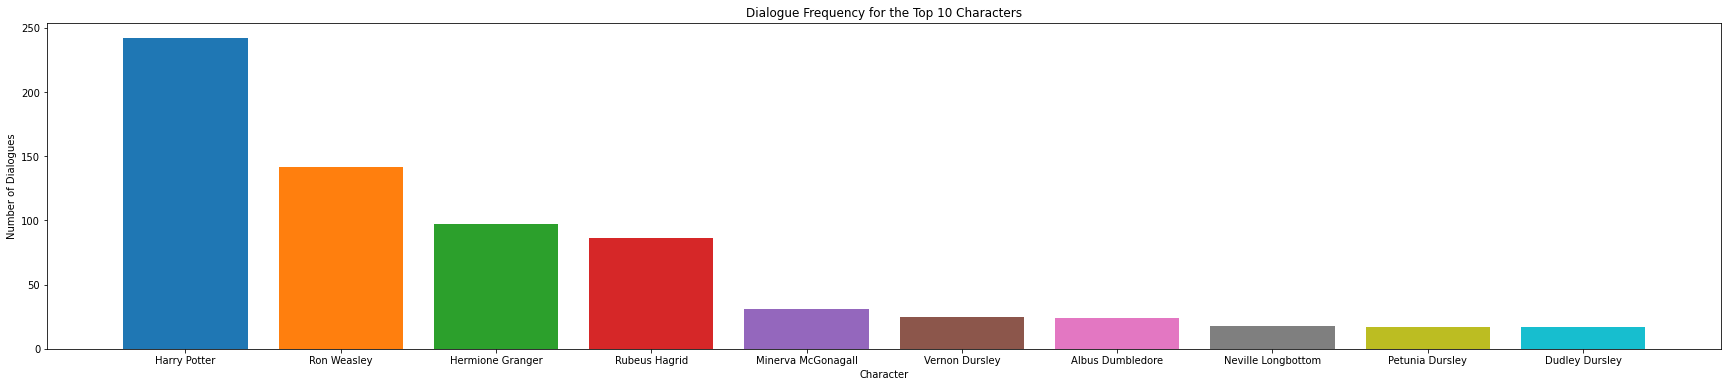

In [6]:
# Now let's look at the ten most talkative characters!

counts = df_text['Character Name'].value_counts()
top_talkative_characters = counts[:10]

plt.figure(figsize=(30, 6))

for character_id, count in top_talkative_characters.items():
    plt.bar(character_id, count)

plt.xlabel("Character")
plt.ylabel("Number of Dialogues")
plt.title("Dialogue Frequency for the Top 10 Characters")
plt.show()

# Not much of a surprise, Harry, Ron and Hermione are the most talkative characters. Interestingly, all Dursley's (Harry's Muggle family) are inside the top ten.

# Dynamik: wer redet mit wem?

# Methoden direkt mit Anwendung am Datensatz zeigen

# Word2Vec schwierig? Vllt streichen

# pro Folie ca. 2 Minuten ;) -> 30 Folien insgesamt

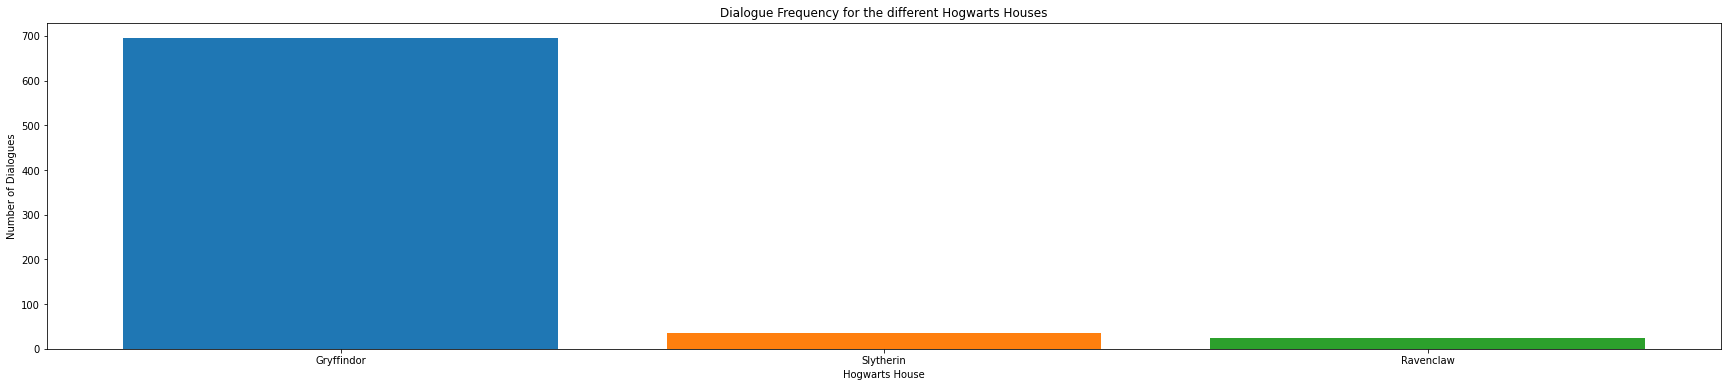

In [9]:
counts = df_text['House'].value_counts()
top_talkative_houses = counts[:10]

plt.figure(figsize=(30, 6))

for character_id, count in top_talkative_houses.items():
    plt.bar(character_id, count)

plt.xlabel("Hogwarts House")
plt.ylabel("Number of Dialogues")
plt.title("Dialogue Frequency for the different Hogwarts Houses")
plt.show()

# Interestingly, no-one from hufflepuff gets to speak in the first movie.

In [10]:
# Spells

df_spells = pd.read_csv("../Harry_Potter_Movies/Spells.csv")
df_spells

,Spell ID,Incantation,Spell Name,Effect,Light
0,1,Accio,Summoning Charm,Summons an object,NaN
1,2,Aguamenti,Water-Making Spell,Conjures water,Icy blue
2,3,Alarte Ascendare,Launch an object up into the air,Rockets target upward,Red
3,4,Alohomora,Unlocking Charm,Unlocks target,Blue
4,5,Arania Exumai,Spider repelling spell,Repels spiders,Blue
...,...,...,...,...,...
56,57,Serpensortia,Snake Summons Spell,Conjures snake,White
57,58,Stupefy,Stunning Spell,Knocks out target,Red
58,59,Vera Verto,Vera Verto,Transforms animals into water goblets,Crystal clear
59,60,Vipera Evanesca,Snake-Vanishing Spell,Vanishes snakes,Black smoke


In [46]:
def extract_spells(row):
    # Split the dialogues into individual words
    words = row['tokens']
    
    # Create a list to store the spells
    spells = []
    
    # Loop through the words and check for combinations of words that are spells
    for i in range(len(words) - 1):
        spell = words[i] + ' ' + words[i+1]
        
        if spell in df_spells['Incantation'].values:
            spells.append(spell)
    
    return spells

# Extract the spell names from the dialogues
df_merged['spells'] = df_merged.apply(extract_spells, axis=1)

# Count the number of occurrences of each spell
spell_counts = df_merged['spells'].value_counts()

# Print the most used spells
print(spell_counts.head())

df_merged.to_csv("dialoguewithspells.csv", columns=["Character ID", "spells"])

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [48]:
words = df_merged["tokens"]
words

0             [known, would, ..., Professor, McGonagall]
1      [Good, evening, Professor, Dumbledore, rumours...
2                     ['m, afraid, Professor, good, bad]
3                                                  [boy]
4                                     [Hagrid, bringing]
                             ...                        
880    [Oh, Go, ..., Oh, listen, Harry, dolt, cousin,...
881    [Hagrid, 're, allowed, magic, away, Hogwarts, ...
882                                [cousin, n't, Eh, go]
883                   [Feels, strange, going, home, n't]
884                            ['m, going, home, really]
Name: tokens, Length: 885, dtype: object

In [51]:
def pos_tag_text(row):
    # import tokens
    tokens = row["tokens"]

    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    return pos_tags

# Apply the pos_tag_text() function to the dialogue column
df_merged['pos_tags'] = df_merged.apply(pos_tag_text, axis=1)

In [54]:
def extract_entities(row):
    # Tokenize the text
    tokens = row["tokens"]
    
    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    # Extract named entities
    chunked = nltk.ne_chunk(pos_tags)
    
    # Extract named entities of type 'PERSON'
    entities = [entity for entity in chunked if hasattr(entity, 'label') and entity.label() == 'PERSON']
    
    return entities

# Apply the extract_entities() function to the dialogue column
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

df_merged['entities'] = df_merged.apply(extract_entities, axis=1)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /Users/simon/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [58]:
df_merged

,Chapter ID,Place ID,Character ID,Dialogue,spells,tokens,pos_tags,entities
0,1,8,4,I should have known that you would be here...P...,[],"[known, would, ..., Professor, McGonagall]","[(known, VBN), (would, MD), (..., :), (Profess...",[]
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",[],"[Good, evening, Professor, Dumbledore, rumours...","[(Good, JJ), (evening, NN), (Professor, NNP), ...","[[(Albus, NNP)]]"
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.",[],"['m, afraid, Professor, good, bad]","[('m, VBP), (afraid, JJ), (Professor, NNP), (g...",[]
3,1,8,7,And the boy?,[],[boy],"[(boy, NN)]",[]
4,1,8,4,Hagrid is bringing him.,[],"[Hagrid, bringing]","[(Hagrid, NNP), (bringing, NN)]",[]
...,...,...,...,...,...,...,...,...
880,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i...",[],"[Oh, Go, ..., Oh, listen, Harry, dolt, cousin,...","[(Oh, UH), (Go, NNP), (..., :), (Oh, NNP), (li...","[[(Harry, NNP)], [(Dudley, NNP)]]"
881,34,36,1,"But Hagrid, we're not allowed to do magic away...",[],"[Hagrid, 're, allowed, magic, away, Hogwarts, ...","[(Hagrid, NNP), ('re, VBP), (allowed, VBN), (m...",[]
882,34,36,5,"I do. But your cousin don't, do he? Eh? Off y...",[],"[cousin, n't, Eh, go]","[(cousin, NN), (n't, RB), (Eh, NNP), (go, VB)]",[]
883,34,36,3,"Feels strange to be going home, doesn't it?",[],"[Feels, strange, going, home, n't]","[(Feels, NNS), (strange, VBP), (going, VBG), (...",[]


In [57]:
df_merged.to_csv("dialoguewithposandentities.csv", columns=["entities"])

In [59]:
df_dialogue

,Chapter ID,Place ID,Character ID,Dialogue,spells
0,1,8,4,I should have known that you would be here...P...,[]
1,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",[]
2,1,8,4,"I'm afraid so, Professor. The good, and the bad.",[]
3,1,8,7,And the boy?,[]
4,1,8,4,Hagrid is bringing him.,[]
...,...,...,...,...,...
880,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i...",[]
881,34,36,1,"But Hagrid, we're not allowed to do magic away...",[]
882,34,36,5,"I do. But your cousin don't, do he? Eh? Off y...",[]
883,34,36,3,"Feels strange to be going home, doesn't it?",[]
